In [2]:
import yfinance as yf
import pandas as pd
import math
import numpy_financial as npf
import statistics

In [3]:
# stock=['0050','1101','1104']
stock1=yf.download("AAPL",start="2012-1-1",end='2014-12-31')
stock2=yf.download("TSLA",start="2012-1-1",end='2014-12-31')
stock3=yf.download("TSM",start="2012-1-1",end='2014-12-31')
stock1=round(stock1,2)
stock2=round(stock2,2)
stock3=round(stock3,2)
stock_list=[stock1,stock2,stock3]
print(stock1.tail(40))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
             Open   High    Low  Close  Adj Close     Volume
Date                                                        
2014-11-03  27.06  27.58  27.00  27.35      24.48  209130400
2014-11-04  27.34  27.37  26.93  27.15      24.30  166297600
2014-11-05  27.27  27.33  27.03  27.22      24.35  149743600
2014-11-06  27.15  27.20  26.95  27.17      24.42  139874000
2014-11-07  27.19  27.33  27.14  27.25      24.49  134766000
2014-11-10  27.25  27.33  27.17  27.21      24.45  108782000
2014-11-11  27.17  27.44  27.10  27.42      24.65  109769200
2014-11-12  27.34  27.86  27.34  27.81      25.00  187769600
2014-11-13  27.95  28.36  27.90  28.20      25.35  238091600
2014-11-14  28.29  28.55  27.80  28.55      25.66  176254400
2014-11-17  28.57  29.32  28.33  28.50      25.61  186986800


In [4]:
for i in stock_list:
    i.drop(["Open"],axis=1,inplace=True)
    i.drop(["High"],axis=1,inplace=True)
    i.drop(["Low"],axis=1,inplace=True)
    i.drop(["Close"],axis=1,inplace=True)
    i.drop(["Volume"],axis=1,inplace=True)

In [5]:
data=pd.merge(stock1,stock2,left_index=True,right_index=True,how='inner')
data.rename(columns={'Adj Close_x':'AAPL','Adj Close_y':'TSLA'},inplace=True)
data=pd.merge(data,stock3,left_index=True,right_index=True,how='inner')
data.rename(columns={'Adj Close':'TSM'},inplace=True)
# print(data.iloc[269])
# print(data.iloc[474])
data.head(60)

,AAPL,TSLA,TSM
Date,,,
2012-01-03,12.50,1.87,9.53
2012-01-04,12.57,1.85,9.44
2012-01-05,12.71,1.81,9.53
2012-01-06,12.84,1.79,9.45
2012-01-09,12.82,1.82,9.61
2012-01-10,12.87,1.84,9.89
2012-01-11,12.84,1.88,9.81
2012-01-12,12.81,1.88,9.93
2012-01-13,12.76,1.52,9.88


# 設定定期投入金額、起始結束日期、投資組合配比

In [6]:
PMT=1000
start='2012-1-1'
end='2014-12-31'
ratio=[0.5,0.25,0.25]

In [7]:
df=data.copy()
dfm=df.resample('BM').last()
dfm=dfm.loc[start:end]
dfm

,AAPL,TSLA,TSM
Date,,,
2012-01-31,13.88,1.94,10.11
2012-02-29,16.49,2.23,10.43
2012-03-30,18.22,2.48,10.98
2012-04-30,17.75,2.21,11.19
2012-05-31,17.56,1.97,9.86
2012-06-29,17.75,2.09,10.03
2012-07-31,18.57,1.83,10.40
2012-08-31,20.31,1.90,10.94
2012-09-28,20.36,1.95,11.77


In [8]:

TotalCost_list=[]
for i in range(1,len(dfm)+1):
    TotalCost=PMT*i
    TotalCost_list.append(TotalCost)
dfm['total_cost']=TotalCost_list

In [9]:
bb=[]
for k in range(len(dfm.columns[0:len(stock_list)])):
    unit_list=[]
    bb.append("unit"+str(k+1))
#     unit_list=[PMT*ratio[k]/dfm[dfm.columns[k]].iloc[0]]
    unit_list=[round(PMT*ratio[k]/dfm[dfm.columns[k]].iloc[0])]

    for i in dfm[dfm.columns[k]].iloc[1:]:
        unit=unit_list[-1]+PMT*ratio[k]/i
        unit=round(unit)
        unit_list.append(unit)
    dfm[bb[k]]=unit_list

dfm.head()

,AAPL,TSLA,TSM,total_cost,unit1,unit2,unit3
Date,,,,,,,
2012-01-31,13.88,1.94,10.11,1000,36,129,25
2012-02-29,16.49,2.23,10.43,2000,66,241,49
2012-03-30,18.22,2.48,10.98,3000,93,342,72
2012-04-30,17.75,2.21,11.19,4000,121,455,94
2012-05-31,17.56,1.97,9.86,5000,149,582,119


In [10]:
aa=[]
for k in range(len(dfm.columns[0:len(stock_list)])):
    preNAV_list=[0]
    aa.append("preNAV"+str(k+1))
    for i,j in enumerate(dfm[dfm.columns[k]].iloc[1:]):
        preNAV=round(dfm[bb[k]].iloc[i]*j,2)
#         preNAV=dfm[bb[k]].iloc[i]*j
        preNAV_list.append(preNAV)
    dfm[aa[k]]=preNAV_list

dfm.head()

,AAPL,TSLA,TSM,total_cost,unit1,unit2,unit3,preNAV1,preNAV2,preNAV3
Date,,,,,,,,,,
2012-01-31,13.88,1.94,10.11,1000,36,129,25,0.00,0.00,0.00
2012-02-29,16.49,2.23,10.43,2000,66,241,49,593.64,287.67,260.75
2012-03-30,18.22,2.48,10.98,3000,93,342,72,1202.52,597.68,538.02
2012-04-30,17.75,2.21,11.19,4000,121,455,94,1650.75,755.82,805.68
2012-05-31,17.56,1.97,9.86,5000,149,582,119,2124.76,896.35,926.84


In [11]:
cc=[]
for k in range(len(dfm.columns[0:len(stock_list)])):
    cc.append("return"+str(k+1)+'(%)')
#     dfm[cc[k]]=(dfm[aa[k]]/(dfm['total_cost']*ratio[k]-PMT*ratio[k])-1)*100
    dfm[cc[k]]=round((dfm[aa[k]]/(dfm['total_cost']*ratio[k]-PMT*ratio[k])-1)*100,2)

dfm.head()

,AAPL,TSLA,TSM,total_cost,unit1,unit2,unit3,preNAV1,preNAV2,preNAV3,return1(%),return2(%),return3(%)
Date,,,,,,,,,,,,,
2012-01-31,13.88,1.94,10.11,1000,36,129,25,0.00,0.00,0.00,NaN,NaN,NaN
2012-02-29,16.49,2.23,10.43,2000,66,241,49,593.64,287.67,260.75,18.73,15.07,4.30
2012-03-30,18.22,2.48,10.98,3000,93,342,72,1202.52,597.68,538.02,20.25,19.54,7.60
2012-04-30,17.75,2.21,11.19,4000,121,455,94,1650.75,755.82,805.68,10.05,0.78,7.42
2012-05-31,17.56,1.97,9.86,5000,149,582,119,2124.76,896.35,926.84,6.24,-10.37,-7.32


Date
2012-01-31      NaN
2012-02-29    14.21
2012-03-30    16.91
2012-04-30     7.08
2012-05-31    -1.30
Freq: BM, dtype: float64


<AxesSubplot: xlabel='Date'>

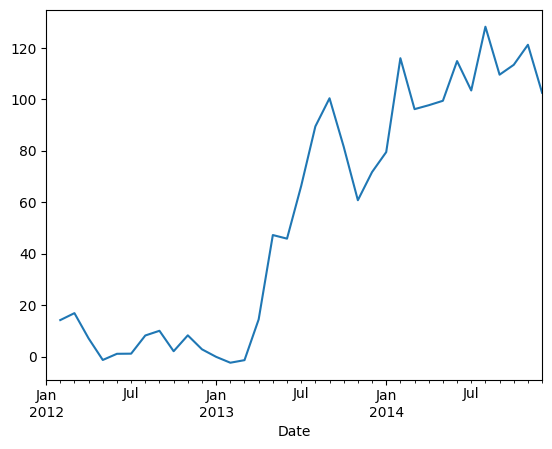

In [12]:
print(round((dfm['return1(%)']*ratio[0]+dfm['return2(%)']*ratio[1]+dfm['return3(%)']*ratio[2]),2).head())
(round((dfm['return1(%)']*ratio[0]+dfm['return2(%)']*ratio[1]+dfm['return3(%)']*ratio[2]),2)).plot()

In [13]:
dfm["final"]=round(dfm['preNAV1']+dfm['preNAV2']+dfm['preNAV3'])
TR=round((dfm['return1(%)'][-1]*ratio[0]+dfm['return2(%)'][-1]*ratio[1]+dfm['return3(%)'][-1]*ratio[2]),2)
print("========================================================")
# print(dfm)
print("========================================================")
print('Total Return:',round((dfm['return1(%)'][-1]*ratio[0]+dfm['return2(%)'][-1]*ratio[1]+dfm['return3(%)'][-1]*ratio[2]),2),'%')
print('CAGR:',round(((dfm['final'][-1]/dfm['total_cost'][0])**(1/(len(dfm)/12))-1)*100,2),'%')
# print('Total Return:',round((dfm['return1(%)'][-1]*ratio[0]+dfm['return2(%)'][-1]*ratio[1]+dfm['return3(%)'][-1]*ratio[2]),2),'%')
print(dfm.loc["2013-01-31"]["final"])
print("========================================================")
dfm

Total Return: 102.6 %
CAGR: 313.91 %
11989.0


,AAPL,TSLA,TSM,total_cost,unit1,unit2,unit3,preNAV1,preNAV2,preNAV3,return1(%),return2(%),return3(%),final
Date,,,,,,,,,,,,,,
2012-01-31,13.88,1.94,10.11,1000,36,129,25,0.00,0.00,0.00,NaN,NaN,NaN,0.0
2012-02-29,16.49,2.23,10.43,2000,66,241,49,593.64,287.67,260.75,18.73,15.07,4.30,1142.0
2012-03-30,18.22,2.48,10.98,3000,93,342,72,1202.52,597.68,538.02,20.25,19.54,7.60,2338.0
2012-04-30,17.75,2.21,11.19,4000,121,455,94,1650.75,755.82,805.68,10.05,0.78,7.42,3212.0
2012-05-31,17.56,1.97,9.86,5000,149,582,119,2124.76,896.35,926.84,6.24,-10.37,-7.32,3948.0
2012-06-29,17.75,2.09,10.03,6000,177,702,144,2644.75,1216.38,1193.57,5.79,-2.69,-4.51,5055.0
2012-07-31,18.57,1.83,10.40,7000,204,839,168,3286.89,1284.66,1497.60,9.56,-14.36,-0.16,6069.0
2012-08-31,20.31,1.90,10.94,8000,229,971,191,4143.24,1594.10,1837.92,18.38,-8.91,5.02,7575.0
2012-09-28,20.36,1.95,11.77,9000,254,1099,212,4662.44,1893.45,2248.07,16.56,-5.33,12.40,8804.0


In [14]:
def MDD(df):
    dr=df.pct_change(1)
    r=dr.add(1).cumprod()
    dd=r.div(r.cummax()).sub(1)
    mdd=dd.min()
    end=dd.idxmin()
    start=r.loc[:end[0]].idxmax()
    days=end-start
    return mdd[0], start[0], end[0], days[0]

# MAX Drawdown


In [15]:
dfffff=dfm['final'].copy()
dfffff=dfffff.loc[:,['final']].to_frame()
# dfffff=dfffff.pct_change(1)
# print(type(dfffff['final'][0]))
# print('最大回撤:',round(MDD(dfffff)[0],3)*100,'%')
# print('最大回撤區間:',MDD(dfffff)[1],'~',MDD(dfffff)[2],MDD(dfffff)[3])
# data.plot()
# (data["AAPL"]*ratio[0]+data["TSLA"]*ratio[1]+data["TSM"]*ratio[2]).plot()
print(dfm.loc["2013-10-31"]["final"])
print(dfm.loc["2013-11-29"]["final"])

(data["AAPL"]+data["TSLA"]+data["TSM"]).plot()
dfffff.columns

IndexingError: Too many indexers

# IRR


In [ ]:
T_R=TR/100
print('總回報',TR,'%')
months=len(dfm)
print("共有:",months,'月')
IRR=(1+T_R)**(12/months)-1
print('內部報酬率(IRR):',round(IRR*100,2),'%')

# stdev

In [ ]:
df_stdev=data.copy()
# print(type(df_stdev))
# df_stdev=df_stdev["AAPL"]+df_stdev["TSLA"]+df_stdev["TSM"]
df_stdev=df_stdev["AAPL"]*ratio[0]+df_stdev["TSLA"]*ratio[1]+df_stdev["TSM"]*ratio[2]
df_stdev=df_stdev.pct_change(1)
risk=df_stdev.std()
risk_Y=risk*252**0.5*100
print("標準差:",round(risk*100,2),"%")
print("年化標準差:","{:.2f}".format(risk_Y),"%")
df_stdev.plot()

# Sharpe ratio

In [ ]:
df_sharpe=data.copy()
df_sharpe=df_sharpe["AAPL"]*0.5+df_sharpe["TSLA"]*ratio[1]+df_sharpe["TSM"]*ratio[2]
df_sharpe=df_sharpe.pct_change(1)
ar=df_sharpe.mean()*252
std=df_sharpe.std()*252**0.5
sp=ar/std
sp=round(sp,2)
print('Sharpe ratio:',sp)


# Sortino ratio

In [ ]:
df_sortino=data.copy()

df_sortino=df_sortino["AAPL"]*ratio[0]+df_sortino["TSLA"]*ratio[1]+df_sortino["TSM"]*ratio[2]

df_sortino=df_sortino.pct_change(1)

std=df_sortino.std()*252**0.5
std_D=df_sortino[df_sortino<0].std()*(252**0.5)
ar=df_sortino.mean()*252
st=ar/std_D
st=round(st,2)

print('sortino ratio:',st)


In [ ]:
dfm.tail(5)

In [ ]:
dffff=data.resample('BM').last().copy()
# dffff=dffff["0050"]*0.5+dffff["0050"]+dffff["0050"]*0.2

print(dfm.head())
print("========================================================")
# print("股票組合含(代號):",stock[0],',',stock[1],',',stock[2])
# print('分別占比為(%):',ratio[0]*100,',',ratio[1]*100,',',ratio[2]*100)
# print("回測區間:",start,'~',end)
print('最後總收益：',dfm["final"][-1])
print('CAGR:',round(((dfm['final'][-1]/dfm['total_cost'][0])**(1/(len(dfm)/12))-1)*100,2),'%')
print('總報酬(Total Return):',round((dfm['return1(%)'][-1]*0.5+dfm['return2(%)'][-1]*0.25+dfm['return3(%)'][-1]*0.25),2),'%')
print('內部報酬率(IRR):',round(IRR*100,2),'%')
# print("標準差(stdev):",round(risk*100,2),"%")
print("標準差:","{:.2f}".format(risk_Y),"%")
print('Sharpe ratio:',sp)
print('sortino ratio:',st)
print('最大回撤(MAX Drawdown):',round(MDD(dfm)[0],3)*100,'%')
print('最大回撤區間:',MDD(dfm)[1].strftime('%Y-%m-%d'),'~',MDD(dfm)[2].strftime('%Y-%m-%d'))
print("========================================================")
